# Practical Assignment 8  

### Image Adhikari
#### Computer Engineering
#### Roll No.: 02

## Deep Learning with Convolution Neural Networks

One of the main disadvantages of ordinary neural networks is that they ignore the structure of input data. All data is converted to a single dimensional array before feeding it into the network. This works well for regular data, but things get difficult when we deal with images.

Let's consider grayscale images. These images are 2D structures and we know that the spatial arrangement of pixels has a lot of hidden information. If we ignore this information, we will be losing a lot of underlying patterns. This is where Convolutional Neural Networks (CNNs) come into the picture. CNNs take the 2D structure of the images into
account when they process them.

CNNs are also made up of neurons consisting of weights and biases. These neurons accept input data, process it, and then output something. The goal of the network is to go from the raw image data in the input layer to the correct class in the output layer. The difference between ordinary neural networks and CNNs is in the type of layers we use and how we treat the input data. CNNs assume that the inputs are images, which allows them to extract properties specific to images. This makes CNNs way more efficient in dealing with images.

## Building a perceptron-based linear regressor

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [54]:
# Define the number of points to generate
num_points = 1200

In [55]:
# Generate the data based on equation y = mx + c
data = []
m = 0.2
c = 0.5
for i in range(num_points):
  # Generate 'x'
  x = np.random.normal(0.0, 0.8)
  # Generate some noise
  noise = np.random.normal(0.0, 0.04)
  #compute 'y'
  y = m * x + c + noise
  data.append([x, y])


In [57]:
# Separate x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

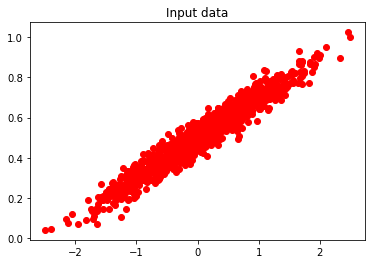

In [58]:
# Plot the generated data
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()

In [59]:
# Generate weights and biases
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

In [60]:
# Define equation for 'y'
y = W * x_data + b

In [61]:
# Define how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

In [62]:
# Define the gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [63]:
# Initialize all the variables
init = tf.initialize_all_variables()

In [64]:
# Start the tensorflow session and run it
sess = tf.Session()
sess.run(init)


ITERATION 1
W = 0.10273579
b = 0.50625455
loss = 0.007318565


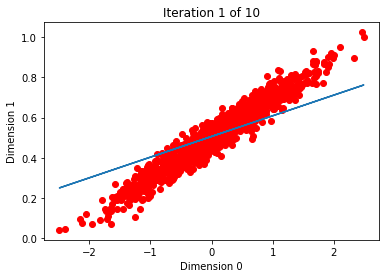


ITERATION 2
W = 0.16232479
b = 0.50180507
loss = 0.0024031447


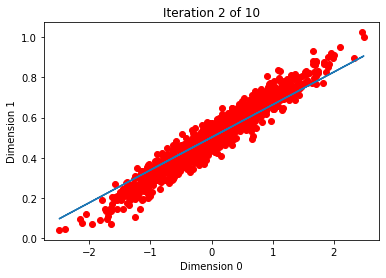


ITERATION 3
W = 0.18478826
b = 0.5004121
loss = 0.0017057916


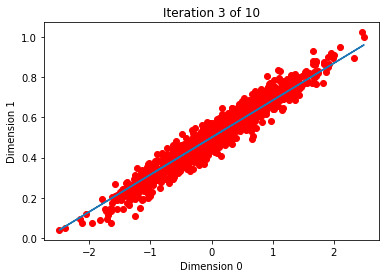


ITERATION 4
W = 0.19324973
b = 0.49988702
loss = 0.0016068463


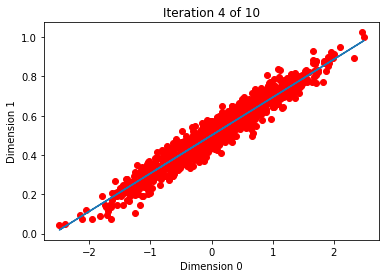


ITERATION 5
W = 0.19643699
b = 0.49968922
loss = 0.0015928076


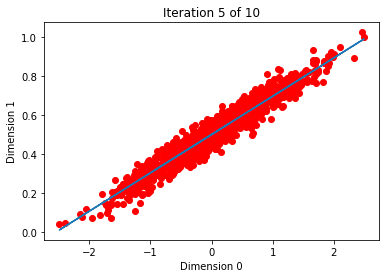


ITERATION 6
W = 0.19763756
b = 0.49961472
loss = 0.0015908156


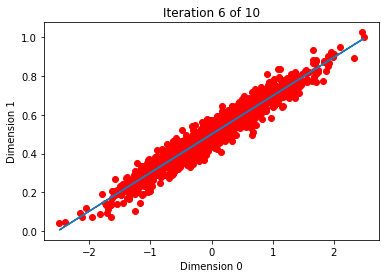


ITERATION 7
W = 0.1980898
b = 0.49958667
loss = 0.0015905328


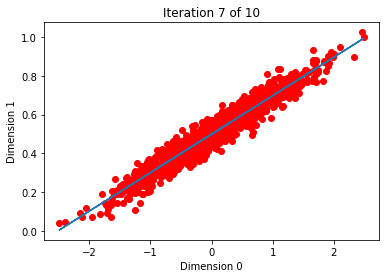


ITERATION 8
W = 0.19826014
b = 0.4995761
loss = 0.0015904928


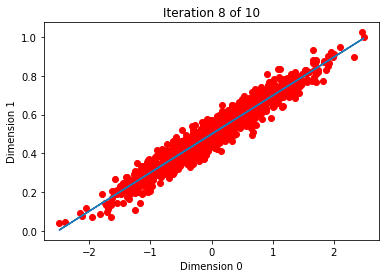


ITERATION 9
W = 0.19832431
b = 0.4995721
loss = 0.001590487


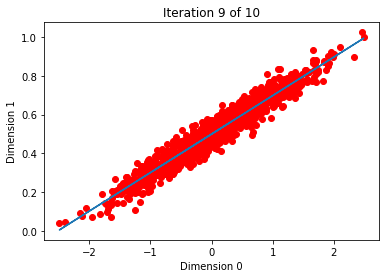


ITERATION 10
W = 0.19834848
b = 0.4995706
loss = 0.0015904864


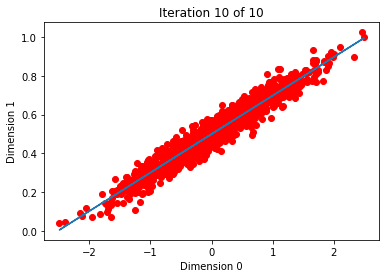

In [65]:
# Start iterating
num_iterations = 10
for step in range(num_iterations):
    # Run the session
    sess.run(train)

    # Print the progress
    print('\nITERATION', step+1)
    print('W =', sess.run(W)[0])
    print('b =', sess.run(b)[0])
    print('loss =', sess.run(loss))

    # Plot the input data 
    plt.plot(x_data, y_data, 'ro')

    # Plot the predicted output line
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))

    # Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations))
    plt.show()

## Building an image classifier using a single layer neural network

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
fitted_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.2905 - acc: 0.9159

C:\Users\Image\anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 3s 55us/sample - loss: 0.2900 - acc: 0.9160 - val_loss: 0.1439 - val_acc: 0.9580
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1414 - acc: 0.9584 - val_loss: 0.1008 - val_acc: 0.9705
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1064 - acc: 0.9683 - val_loss: 0.0855 - val_acc: 0.9731
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0886 - acc: 0.9724 - val_loss: 0.0759 - val_acc: 0.9765
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0754 - acc: 0.9767 - val_loss: 0.0665 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0623 - acc: 0.9804 - val_loss: 0.0708 - val_acc: 0.9783
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0573 - acc: 0.9818 - val_loss: 0.0694 - val_acc: 0.9778
Epoch 8/10
60000/60000 [==============

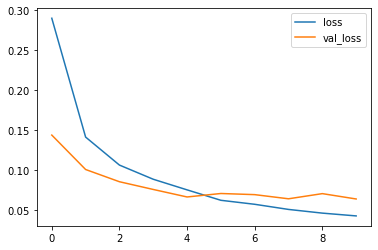

In [10]:
plt.plot(fitted_model.history['loss'], label= 'loss')
plt.plot(fitted_model.history['val_loss'], label= 'val_loss')
plt.legend()

In [11]:
print(model.evaluate(x_test, y_test))

[0.06394931231041555, 0.9805]


C:\Users\Image\anaconda3\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Confusion matrix without normalization
[[ 967    0    2    1    1    1    5    1    1    1]
 [   0 1127    4    0    0    0    1    0    3    0]
 [   1    0 1017    2    2    0    2    4    3    1]
 [   0    0    7  990    0    1    0    6    3    3]
 [   0    0    4    0  962    0    5    4    1    6]
 [   2    0    0    8    1  871    5    1    3    1]
 [   2    3    1    0    2    2  946    0    2    0]
 [   1    6   12    1    2    0    0 1002    0    4]
 [   3    0    5    5    5    4    3    3  944    2]
 [   1    3    0    7    7    3    1    7    1  979]]


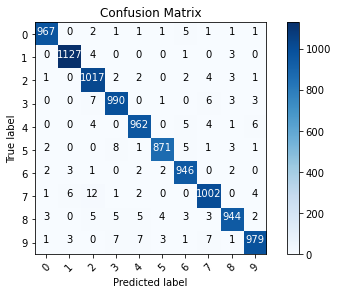

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

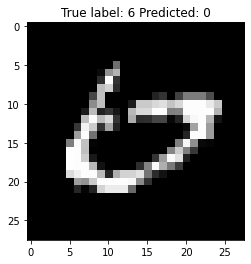

In [13]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

## Building an image classifier using a Convolution Neural Network

In [14]:
mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = mnist

In [15]:
print("X_train Shape: ", x_train.shape)
print("X_Test Shape: ", x_test.shape)

X_train Shape:  (60000, 28, 28)
X_Test Shape:  (10000, 28, 28)


In [16]:
def get_weights(shape):
    data = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(data)

def get_biases(shape):
    data = tf.constant(0.1, shape=shape)
    return tf.Variable(data)

def create_layer(shape):
    # Get the weights and biases 
    W = get_weights(shape)
    b = get_biases([shape[-1]])

    return W, b

def convolution_2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], 
            padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
            strides=[1, 2, 2, 1], padding='SAME')

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2676 - acc: 0.9232
Epoch 2/30
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1226 - acc: 0.9636
Epoch 3/30
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0865 - acc: 0.9742
Epoch 4/30
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0650 - acc: 0.9797
Epoch 5/30
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0518 - acc: 0.9843
Epoch 6/30
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0420 - acc: 0.9870
Epoch 7/30
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0340 - acc: 0.9894
Epoch 8/30
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0279 - acc: 0.9912
Epoch 9/30
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0240 - acc: 0.9930
Epoch 10/30
60000/60000 [==============================] - 

In [19]:
model.evaluate(x_test,y_test)

C:\Users\Image\anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.1221212268600104, 0.9788]

In [20]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [22]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 304us/sample - loss: 0.1521 - acc: 0.9557
Epoch 2/5
60000/60000 [==============================] - 24s 399us/sample - loss: 0.0527 - acc: 0.9841
Epoch 3/5
60000/60000 [==============================] - 26s 436us/sample - loss: 0.0335 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 26s 430us/sample - loss: 0.0230 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 25s 410us/sample - loss: 0.0152 - acc: 0.9950


In [24]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
model.evaluate(x_test,y_test)

[0.04685883577395252, 0.9859]

## CNN on CIFAR10 Dataset

In [68]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras import backend as K
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot, plot_model
import numpy as np
import matplotlib.pyplot as plt

In [69]:
np.random.seed(2017)
img_rows, img_cols = 32, 32
img_channels = 3
batch_size = 256
nb_classes = 10
nb_epoch = 4
nb_filters = 10
nb_conv = 3
nb_pool = 2
kernel_size = 3 # convolution kernel size

In [70]:
if K.image_data_format() == 'channels_first':
  input_shape = (3, img_rows, img_cols)
else:
  input_shape = (img_rows, img_cols, 3)

In [71]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [72]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
 Conv2D(nb_filters, kernel_size, input_shape=input_shape),
 Activation('relu'),
 Conv2D(nb_filters, kernel_size),
 Activation('relu'),
 MaxPooling2D(pool_size=(nb_pool, nb_pool)),
 Flatten(),
]

classification_layers = [
 Dense(512),
 Activation('relu'),
 Dense(nb_classes),
 Activation('softmax')
]

In [73]:
# create complete model
model = Sequential(feature_layers + classification_layers)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 10)        280       
                                                                 
 activation_8 (Activation)   (None, 30, 30, 10)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 activation_9 (Activation)   (None, 28, 28, 10)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1960)              0         
                                                      

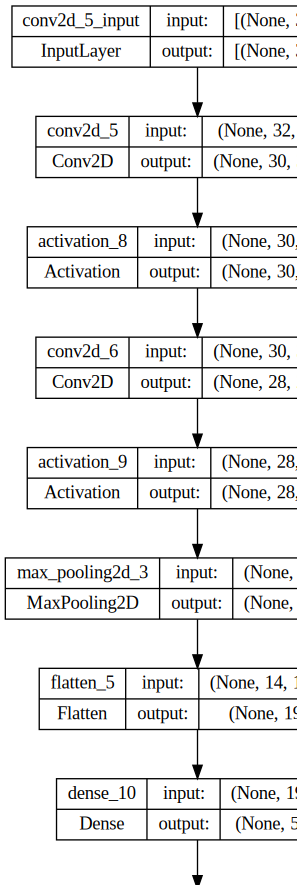

In [75]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [76]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test),\
          epochs=nb_epoch, batch_size=batch_size, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/4


C:\Users\Image\anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 - 21s - loss: 1.8213 - acc: 0.3531 - val_loss: 1.5377 - val_acc: 0.4567 - 21s/epoch - 412us/sample
Epoch 2/4
50000/50000 - 20s - loss: 1.3998 - acc: 0.5005 - val_loss: 1.3353 - val_acc: 0.5222 - 20s/epoch - 409us/sample
Epoch 3/4
50000/50000 - 21s - loss: 1.2420 - acc: 0.5608 - val_loss: 1.2392 - val_acc: 0.5588 - 21s/epoch - 417us/sample
Epoch 4/4
50000/50000 - 21s - loss: 1.1545 - acc: 0.5917 - val_loss: 1.2061 - val_acc: 0.5634 - 21s/epoch - 415us/sample


#### Now, to visualize each layer,

In [35]:
# function for Visualization
# visualization
def draw(data, row, col, n):
  plt.subplot(row, col, n)
  plt.imshow(data)

def draw_digit(data, row, col):
  for j in range(row):
    plt.figure(figsize=(16,16))
    for i in range(col):
      plt.subplot(row, col, i+1)
      plt.imshow(data[j,:,:,i])
      plt.axis('off')
    plt.tight_layout()
  plt.show()

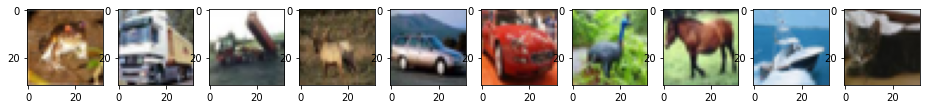

In [36]:
### Input layer (original image)
show_size = 10
plt.figure(figsize=(16,16))
for i in range(show_size):
  draw(X_train[i], 1, show_size, i+1)
plt.show()

first layer shape:  (10, 30, 30, 10)


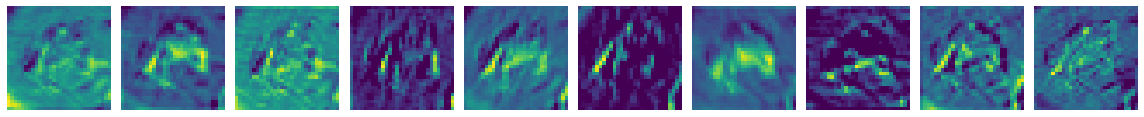

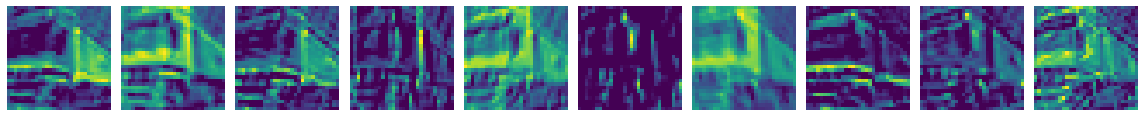

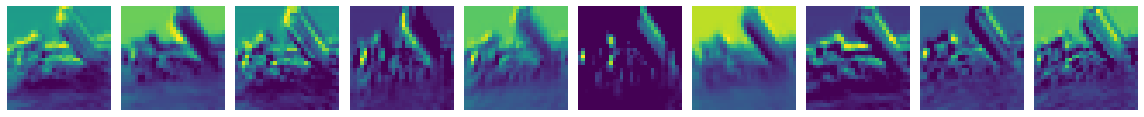

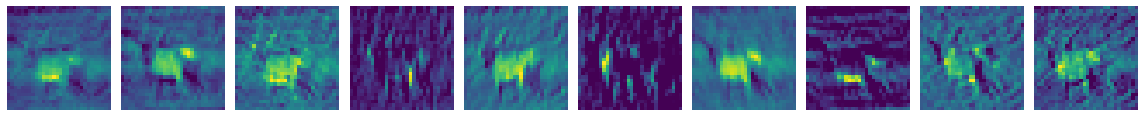

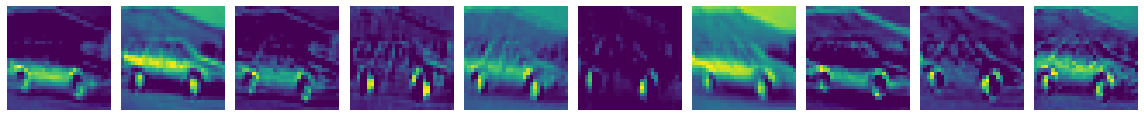

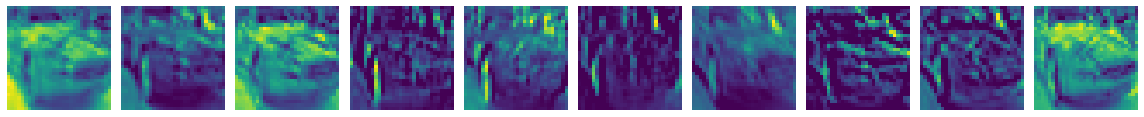

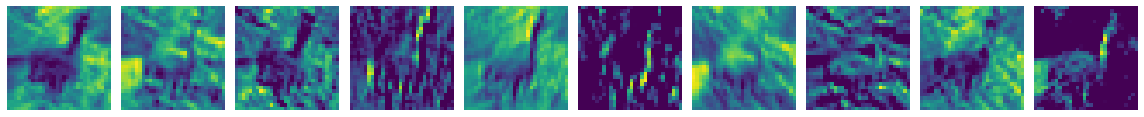

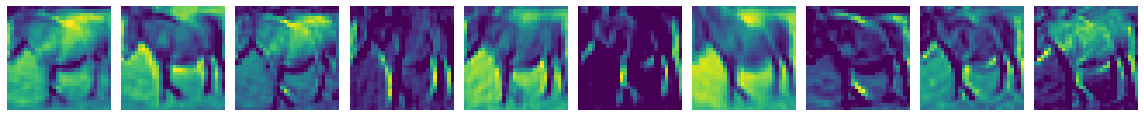

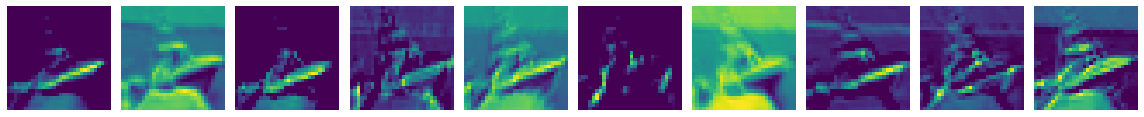

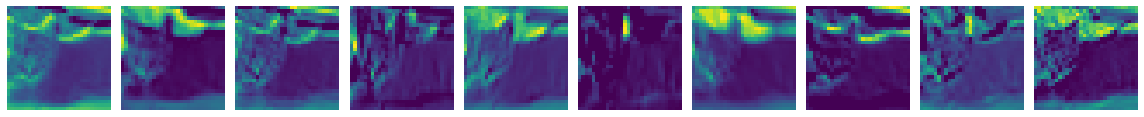

In [37]:
# first layer
get_first_layer_output = K.function([model.layers[0].input],\
                                    [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]
print ('first layer shape: ', first_layer.shape)
draw_digit(first_layer, first_layer.shape[0], first_layer.shape[3])

second layer shape:  (10, 28, 28, 10)


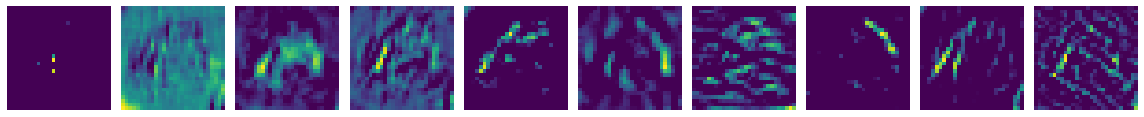

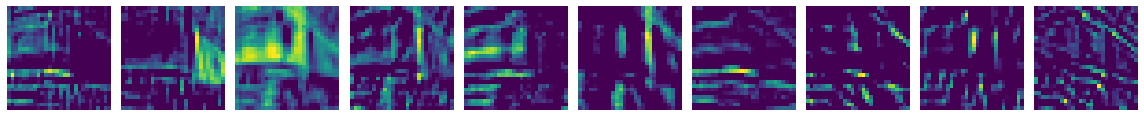

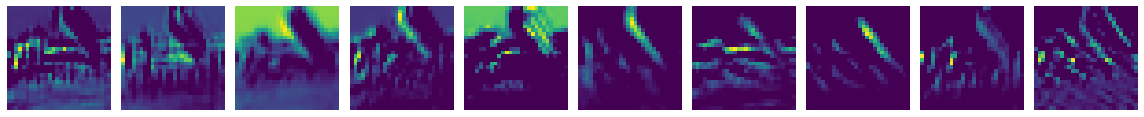

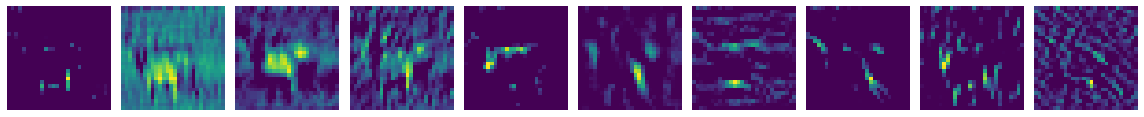

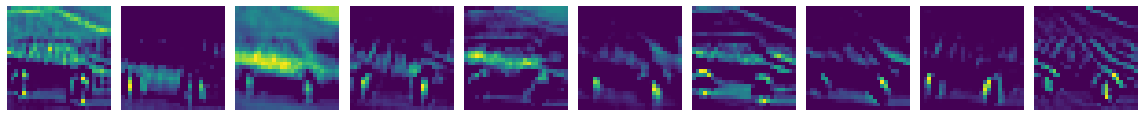

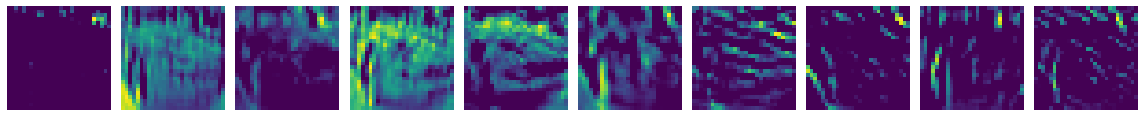

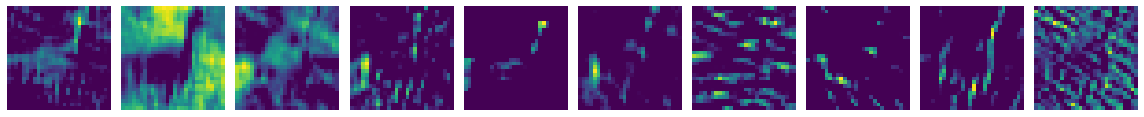

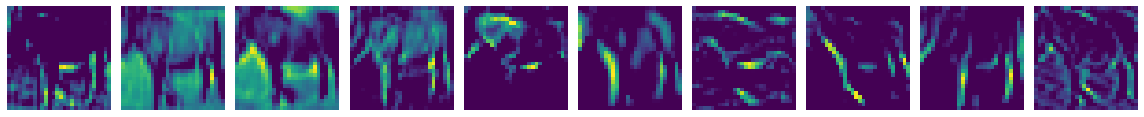

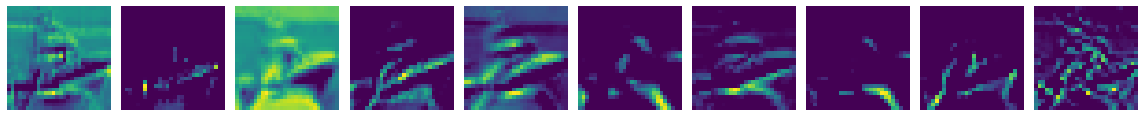

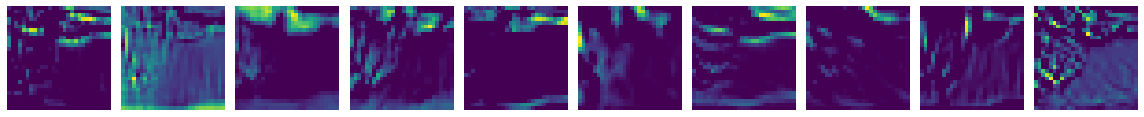

In [38]:
# second layer
get_second_layer_output = K.function([model.layers[0].input],
                                     [model.layers[3].output])
second_layers = get_second_layer_output([X_train[0:show_size]])[0]
print ('second layer shape: ', second_layers.shape)
draw_digit(second_layers, second_layers.shape[0], second_layers.shape[3])

third layer shape:  (10, 14, 14, 10)


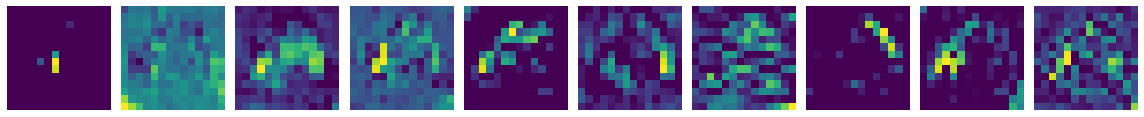

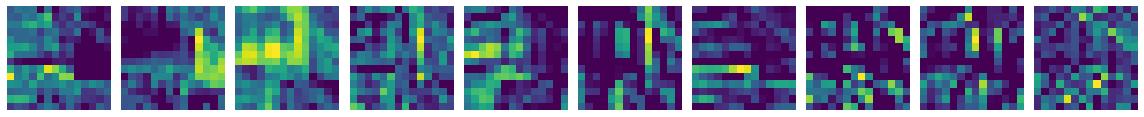

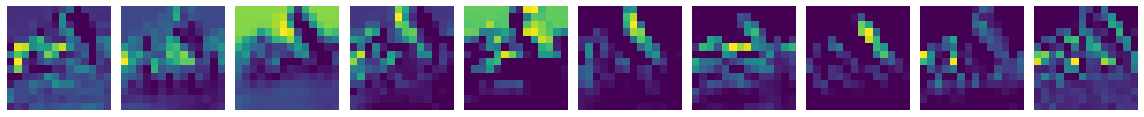

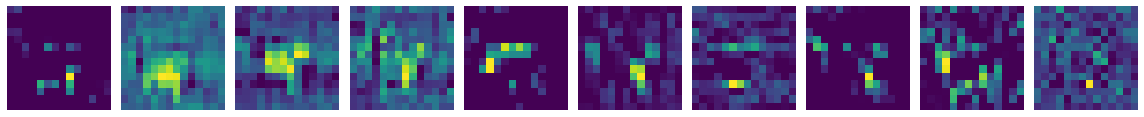

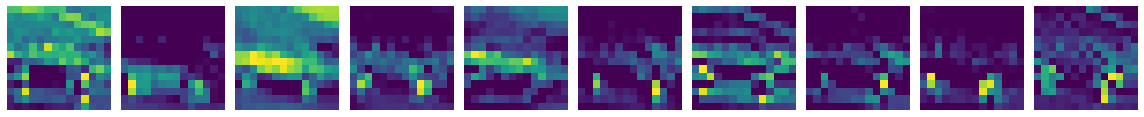

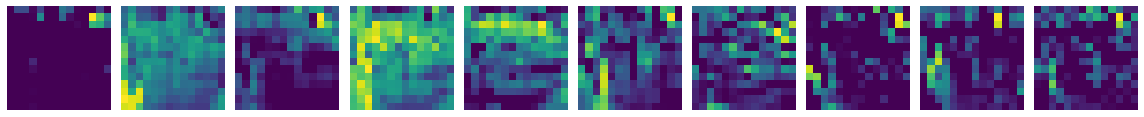

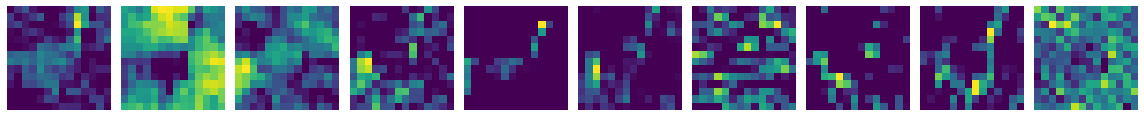

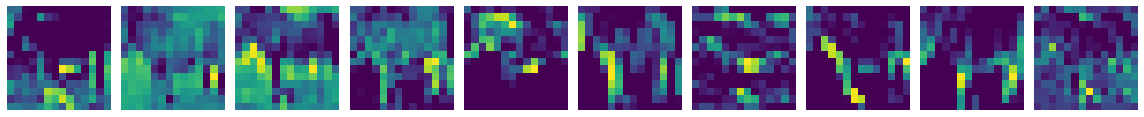

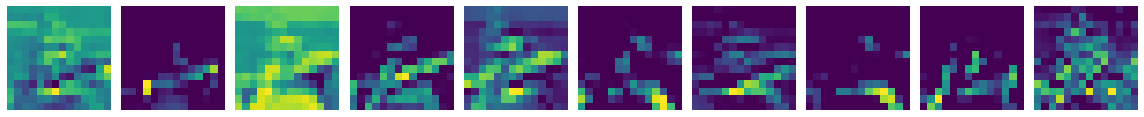

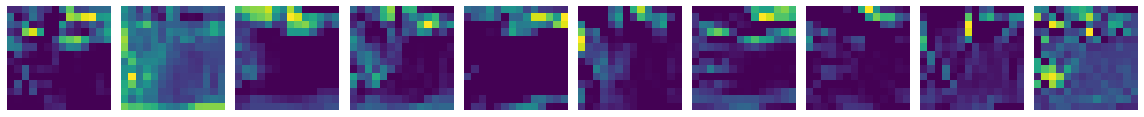

In [39]:
# third layer
get_third_layer_output = K.function([model.layers[0].input],
 [model.layers[4].output])
third_layers = get_third_layer_output([X_train[0:show_size]])[0]
print ('third layer shape: ', third_layers.shape)
draw_digit(third_layers, third_layers.shape[0], third_layers.shape[3])

## CNN on MNIST Dataset

In [40]:
import keras
keras.backend.backend()
keras.backend.image_data_format()

'channels_last'

In [41]:
# using theano as backend
K = keras.backend.backend()
if K=='tensorflow':
  keras.backend.set_image_data_format('channels_last')
else:
  keras.backend.set_image_data_format('channels_first')
# print(K.backend())

In [42]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(2017)

In [43]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras import backend as K
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot, plot_model

In [44]:
nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter
nb_epoch = 5
kernel_size = 3 # convolution kernel size
nb_classes = 10
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
 input_shape = (1, img_rows, img_cols)
else:
 input_shape = (img_rows, img_cols, 1)

print(K.image_data_format())

channels_last


In [45]:
# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 25
X_test /= 25

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [46]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
 Conv2D(nb_filters, kernel_size, input_shape=input_shape),
 Activation('relu'),
 Conv2D(nb_filters, kernel_size),
 Activation('relu'),
 MaxPooling2D(pool_size = nb_pool),
 Dropout(0.25),
 Flatten(),
]

classification_layers = [
 Dense(128),
 Activation('relu'),
 Dropout(0.5),
 Dense(nb_classes),
 Activation('softmax')
]

In [47]:
# create complete model
model = Sequential(feature_layers + classification_layers)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 activation_4 (Activation)   (None, 26, 26, 5)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 5)         230       
                                                                 
 activation_5 (Activation)   (None, 24, 24, 5)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 5)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 5)         0         
                                                      

In [48]:
model.fit(X_train, Y_train, batch_size=256, epochs=nb_epoch, verbose=2, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 - 12s - loss: 0.7761 - acc: 0.7652 - val_loss: 0.1697 - val_acc: 0.9511 - 12s/epoch - 240us/sample
Epoch 2/5
48000/48000 - 10s - loss: 0.2779 - acc: 0.9174 - val_loss: 0.1091 - val_acc: 0.9680 - 10s/epoch - 214us/sample
Epoch 3/5
48000/48000 - 9s - loss: 0.2075 - acc: 0.9367 - val_loss: 0.0897 - val_acc: 0.9724 - 9s/epoch - 179us/sample
Epoch 4/5
48000/48000 - 9s - loss: 0.1699 - acc: 0.9475 - val_loss: 0.0734 - val_acc: 0.9787 - 9s/epoch - 178us/sample
Epoch 5/5
48000/48000 - 9s - loss: 0.1455 - acc: 0.9554 - val_loss: 0.0688 - val_acc: 0.9789 - 9s/epoch - 178us/sample


## Visualization of Layers

In [49]:
# visualization
def draw(data, row, col, n):
  plt.subplot(row, col, n)
  plt.imshow(data, cmap=plt.cm.gray_r)
  plt.axis('off')

def draw_digit(data, row, col):
  for j in range(row):
    plt.figure(figsize=(8,8))
    for i in range(col):
      plt.subplot(row, col, i+1)
      plt.imshow(data[j,:,:,i], cmap=plt.cm.gray_r)
      plt.axis('off')
  plt.tight_layout()
  plt.show()

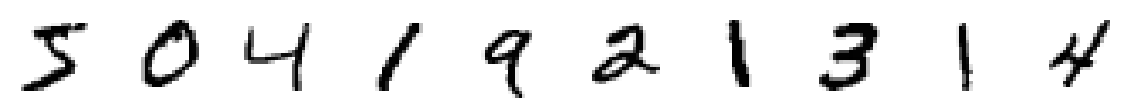

In [50]:
# Sample input layer (original image)
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
  draw(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

first layer shape:  (10, 26, 26, 5)


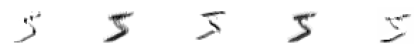

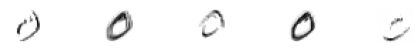

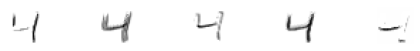

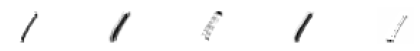

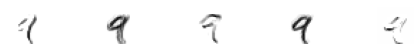

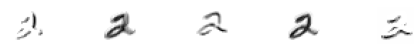

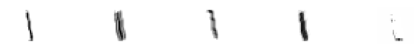

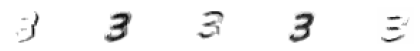

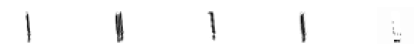

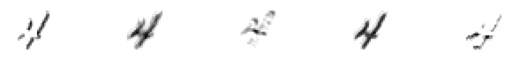

In [52]:
# First layer with 5 filters
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]
print ('first layer shape: ', first_layer.shape)
draw_digit(first_layer, first_layer.shape[0], first_layer.shape[3])